<a href="https://colab.research.google.com/github/Codefedy/Heart-Disease-Predictive-Model/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns #for plotting

In [3]:
import matplotlib.pyplot as plt

Loading Data

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dp = pd.read_csv('/content/drive/My Drive/UWE-ML/HD_Prediction.csv')

In [9]:
dp.head(20)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [10]:
dp = dp.drop(dp.columns[0], axis=1)

In [11]:


dp.columns = ['age', 'sex', 'chest_pain_type', 'blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ekg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'slope_of_ST', 'num_vessels_fluro', 'thallium', 'target(HeartDisease)']



In [12]:
dp['chest_pain_type'][dp['chest_pain_type'] == 1] = 'typical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 2] = 'atypical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 3] = 'non-anginal pain'
dp['chest_pain_type'][dp['chest_pain_type'] == 4] = 'variant angina'

<ipython-input-12-3a7b5e0d2ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['chest_pain_type'][dp['chest_pain_type'] == 1] = 'typical angina'


In [13]:
dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

<ipython-input-13-bb1fd9ff5767>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'


In [14]:

dp['rest_ekg'][dp['rest_ekg'] == 0] = 'normal'
dp['rest_ekg'][dp['rest_ekg'] == 1] = 'ST-T wave abnormality'
dp['rest_ekg'][dp['rest_ekg'] == 2] = 'left ventricular hypertrophy'

<ipython-input-14-a32e85eb2f0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['rest_ekg'][dp['rest_ekg'] == 0] = 'normal'


In [15]:
dp['exercise_angina'][dp['exercise_angina'] == 0] = 'no'
dp['exercise_angina'][dp['exercise_angina'] == 1] = 'yes'

<ipython-input-15-efbd818080bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['exercise_angina'][dp['exercise_angina'] == 0] = 'no'


In [16]:
dp['slope_of_ST'][dp['slope_of_ST'] == 1] = 'upsloping'
dp['slope_of_ST'][dp['slope_of_ST'] == 2] = 'flat'
dp['slope_of_ST'][dp['slope_of_ST'] == 3] = 'downsloping'

<ipython-input-16-6b7f6d9331d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['slope_of_ST'][dp['slope_of_ST'] == 1] = 'upsloping'


In [17]:
dp['thallium'][dp['thallium'] == 1] = 'normal'
dp['thallium'][dp['thallium'] == 2] = 'fixed defect'
dp['thallium'][dp['thallium'] == 3] = 'reversable defect'

<ipython-input-17-4b9a925018b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['thallium'][dp['thallium'] == 1] = 'normal'
<ipython-input-17-4b9a925018b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['thallium'][dp['thallium'] == 2] = 'fixed defect'
<ipython-input-17-4b9a925018b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['thallium'][dp['thallium'] == 3] = 'reversable defect'


Lets check correctness of the data types.

In [18]:


dp.dtypes



age                       int64
sex                       int64
chest_pain_type          object
blood_pressure            int64
cholesterol               int64
fasting_blood_sugar      object
rest_ekg                 object
max_heart_rate            int64
exercise_angina          object
st_depression           float64
slope_of_ST              object
num_vessels_fluro         int64
thallium                 object
target(HeartDisease)     object
dtype: object

In [19]:
dp.head(10)

,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,st_depression,slope_of_ST,num_vessels_fluro,thallium,target(HeartDisease)
0,70,1,variant angina,130,322,lower than 120mg/ml,left ventricular hypertrophy,109,no,2.4,flat,3,reversable defect,Presence
1,67,0,non-anginal pain,115,564,lower than 120mg/ml,left ventricular hypertrophy,160,no,1.6,flat,0,7,Absence
2,57,1,atypical angina,124,261,lower than 120mg/ml,normal,141,no,0.3,upsloping,0,7,Presence
3,64,1,variant angina,128,263,lower than 120mg/ml,normal,105,yes,0.2,flat,1,7,Absence
4,74,0,atypical angina,120,269,lower than 120mg/ml,left ventricular hypertrophy,121,yes,0.2,upsloping,1,reversable defect,Absence
5,65,1,variant angina,120,177,lower than 120mg/ml,normal,140,no,0.4,upsloping,0,7,Absence
6,56,1,non-anginal pain,130,256,greater than 120mg/ml,left ventricular hypertrophy,142,yes,0.6,flat,1,6,Presence
7,59,1,variant angina,110,239,lower than 120mg/ml,left ventricular hypertrophy,142,yes,1.2,flat,1,7,Presence
8,60,1,variant angina,140,293,lower than 120mg/ml,left ventricular hypertrophy,170,no,1.2,flat,2,7,Presence
9,63,0,variant angina,150,407,lower than 120mg/ml,left ventricular hypertrophy,154,no,4.0,flat,3,7,Presence


Now, lets perform EDA on the dataset to gain insights that will inform our decision.

In [20]:
print(dp.shape)

(270, 14)


In [ ]:
print(dp.head())

In [ ]:
print(dp.describe())


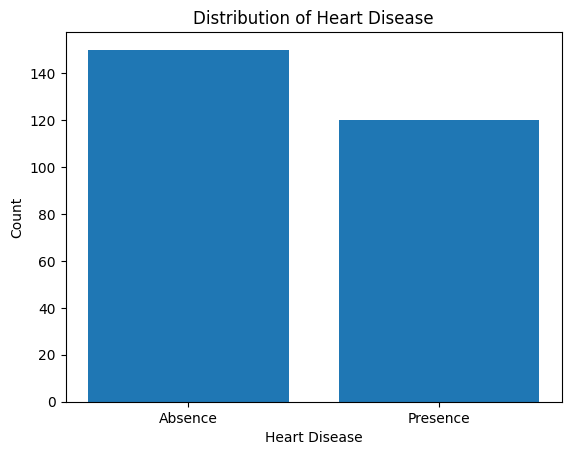

In [44]:
target_counts = dp['target(HeartDisease)'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

<ipython-input-45-4cdd69e56a70>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dp.corr()


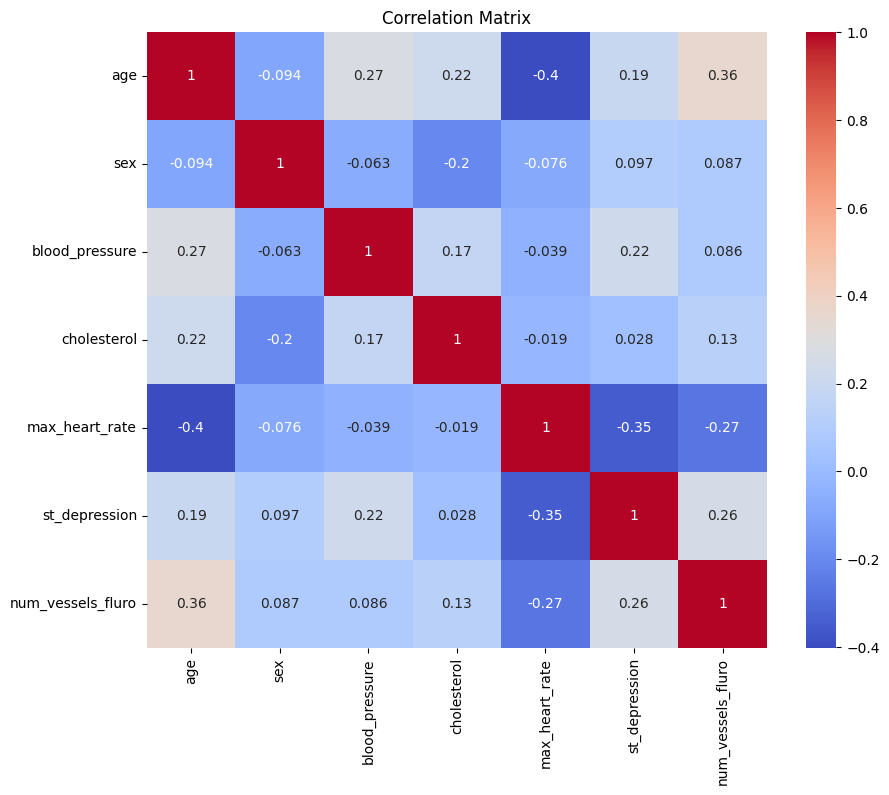

In [45]:
corr_matrix = dp.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


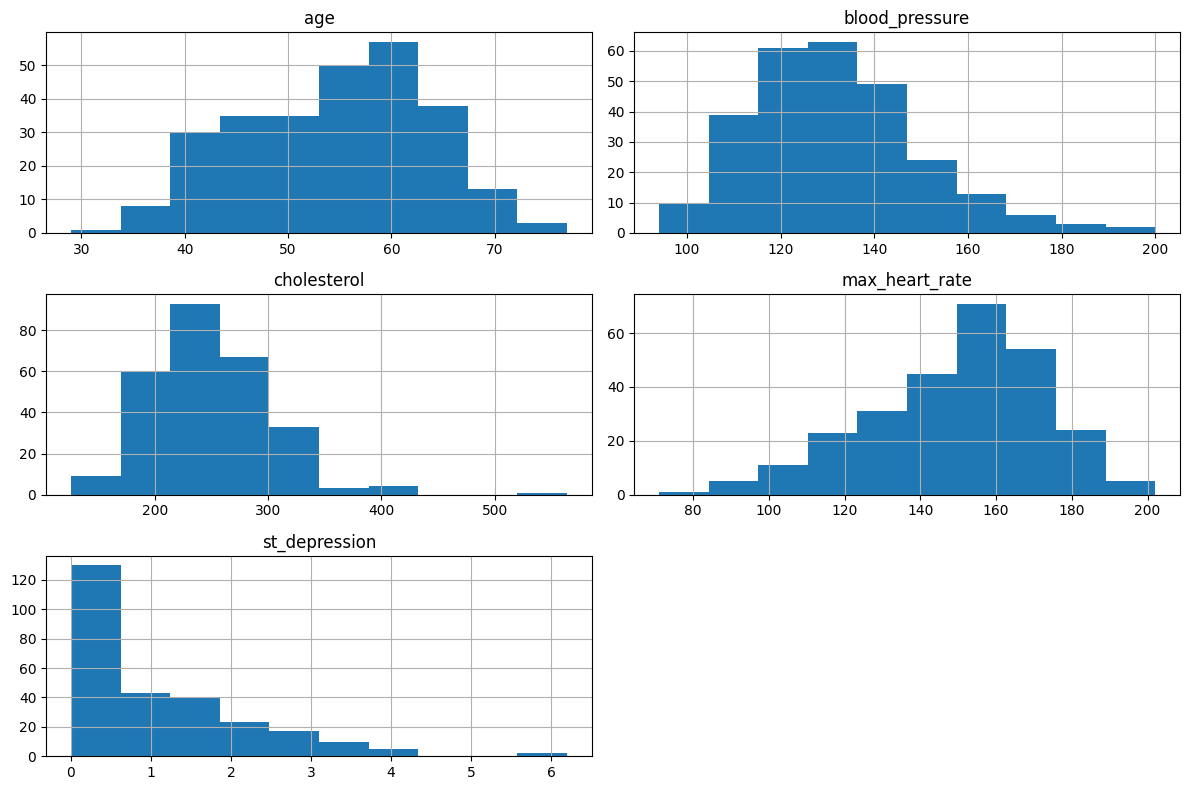

In [46]:
numerical_cols = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
dp[numerical_cols].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

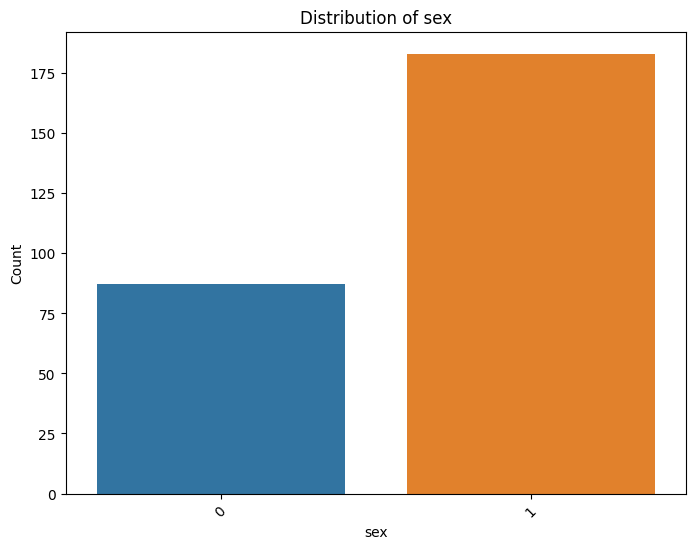

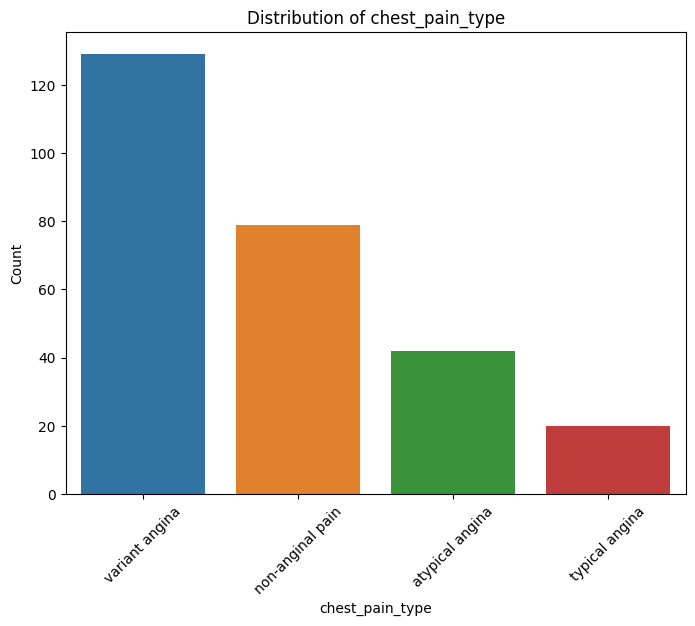

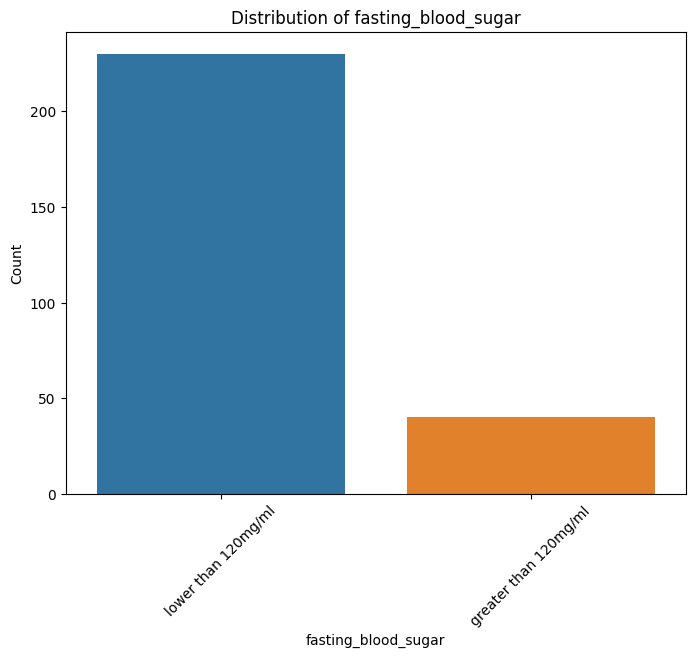

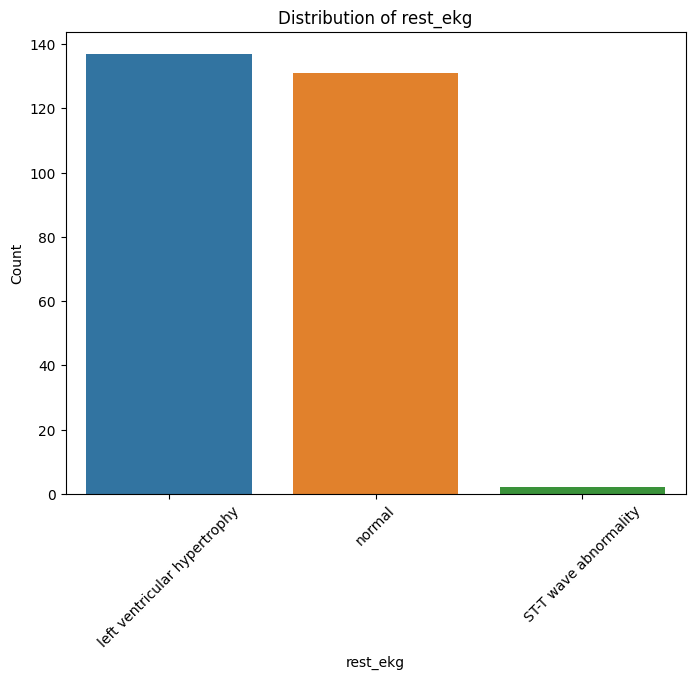

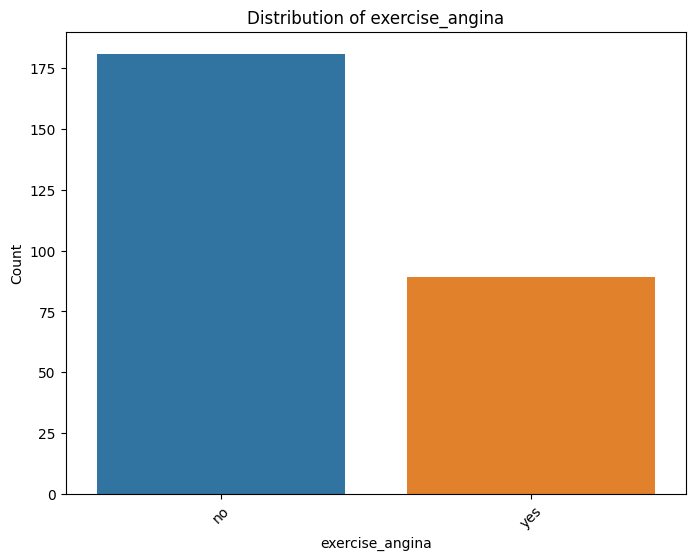

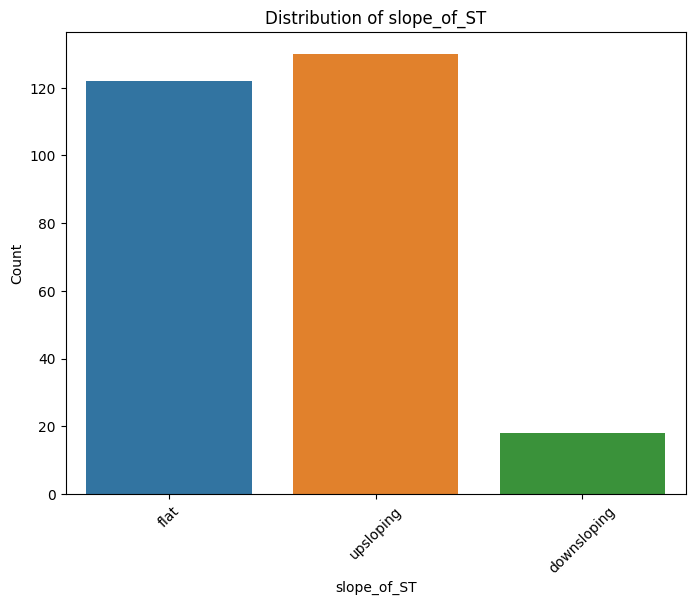

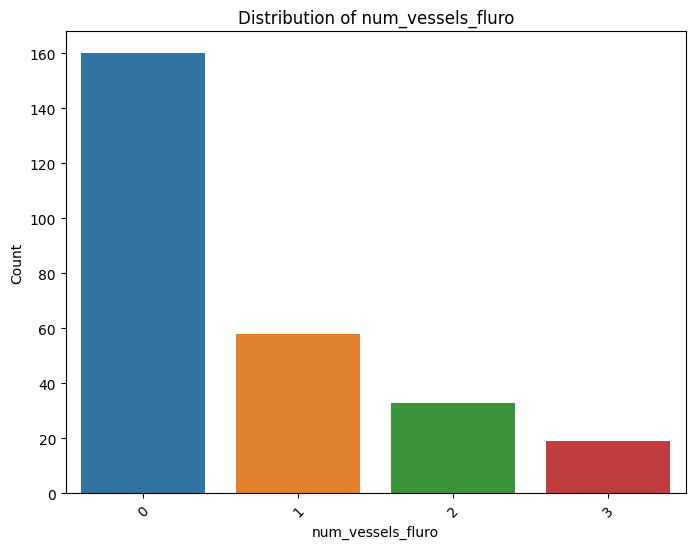

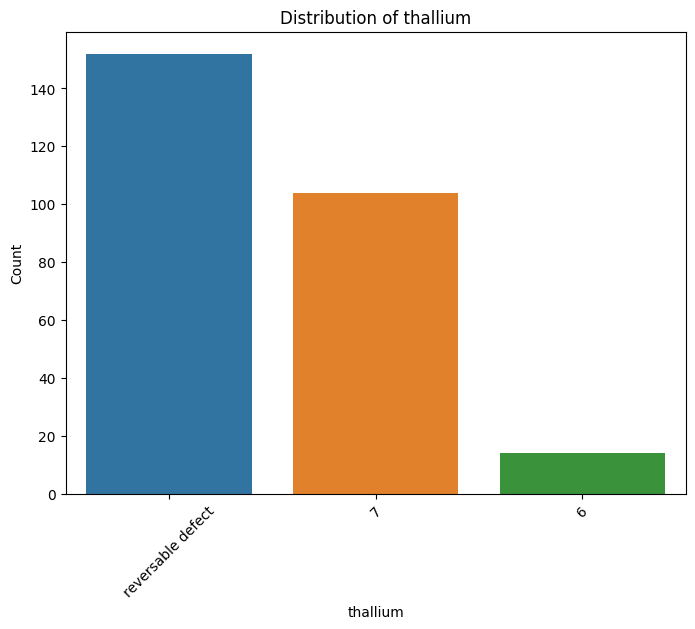

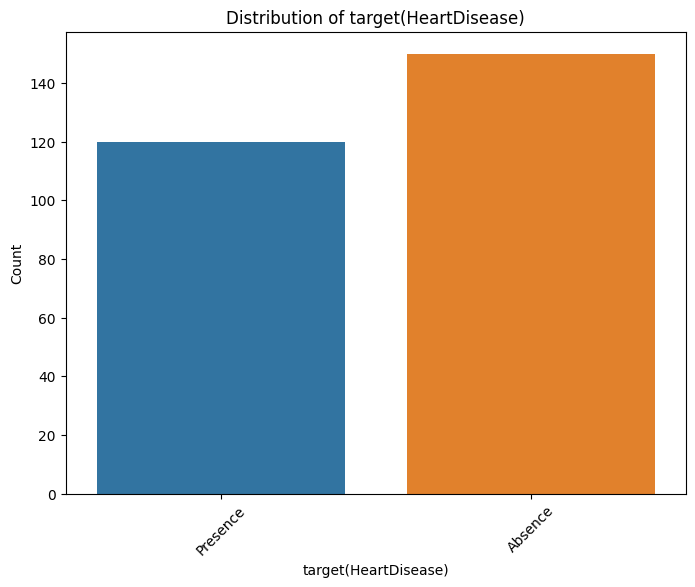

In [47]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ekg', 'exercise_angina', 'slope_of_ST', 'num_vessels_fluro', 'thallium', 'target(HeartDisease)']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=dp)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

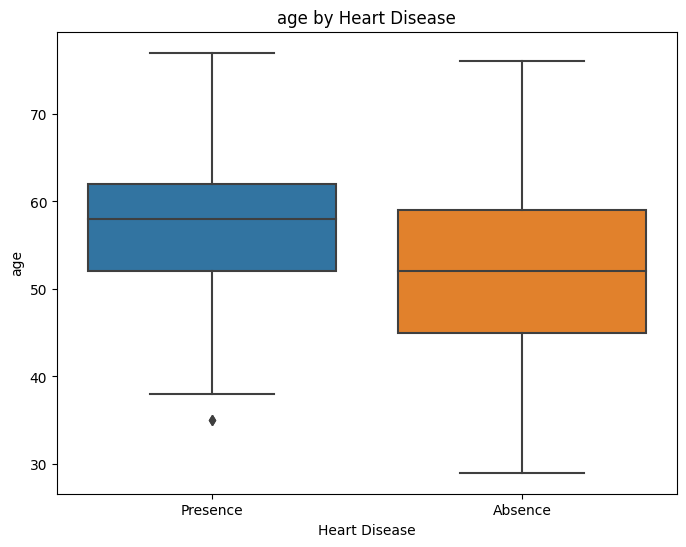

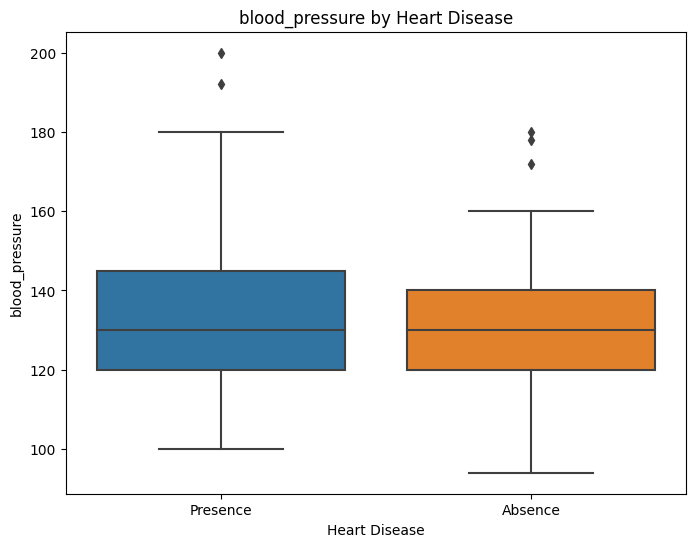

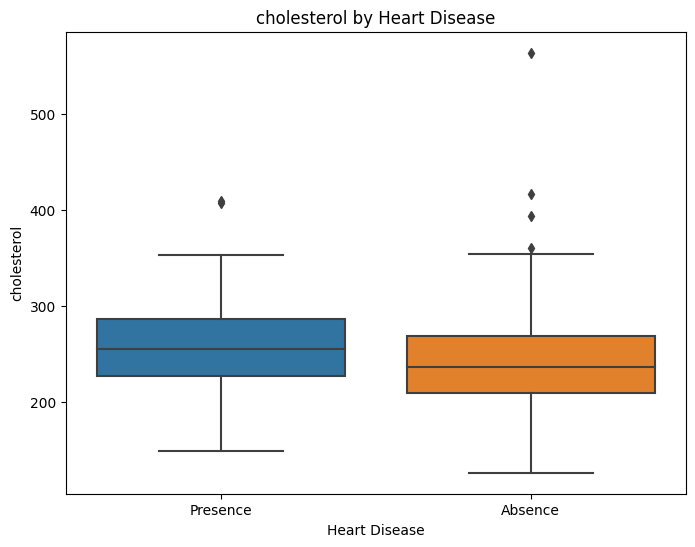

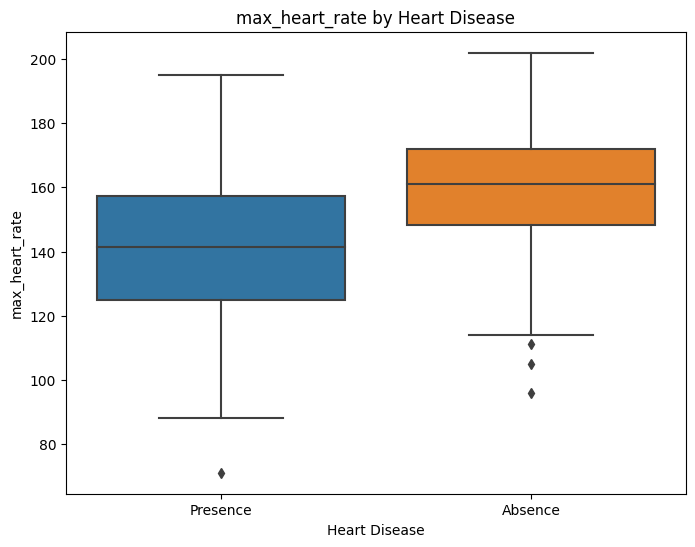

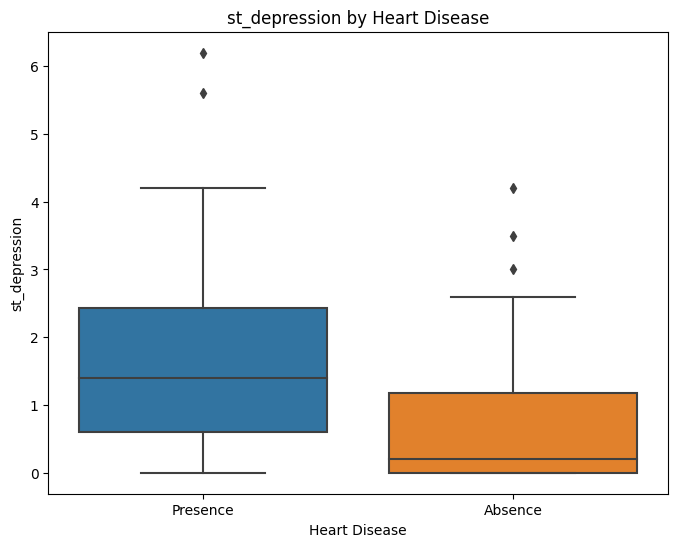

In [48]:
numerical_cols = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target(HeartDisease)', y=col, data=dp)
    plt.title(f'{col} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
    plt.show()

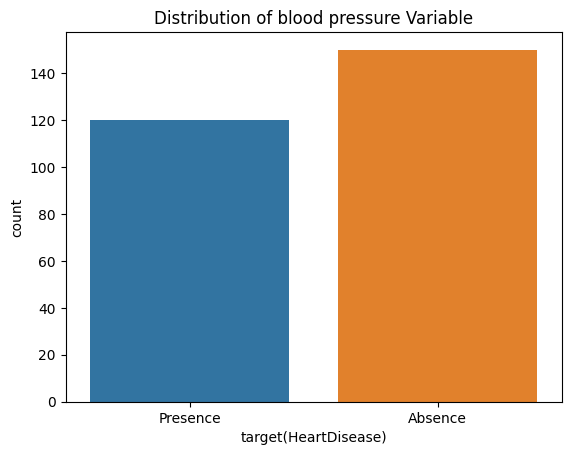

In [23]:
sns.countplot(x='target(HeartDisease)', data=dp)
plt.title('Distribution of blood pressure Variable')
plt.show()

Scattered plot

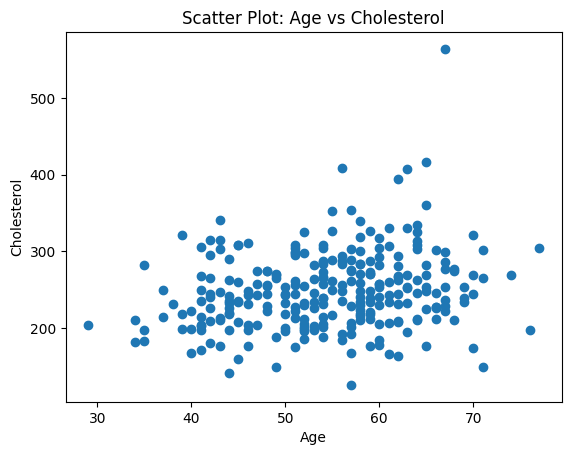

In [24]:
plt.scatter(dp['age'], dp['cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.show()

Box plot

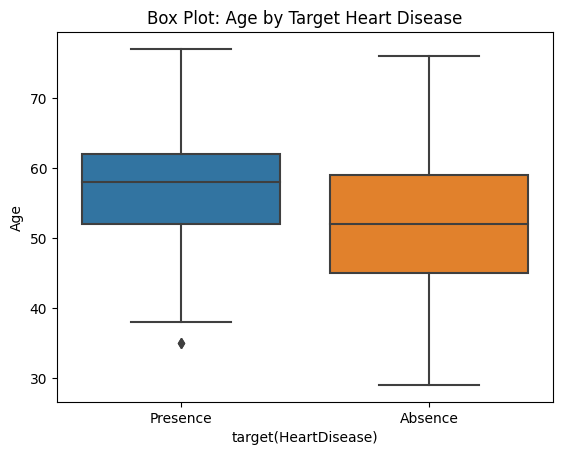

In [25]:
sns.boxplot(x='target(HeartDisease)', y='age', data=dp)
plt.xlabel('target(HeartDisease)')
plt.ylabel('Age')
plt.title('Box Plot: Age by Target Heart Disease')
plt.show()

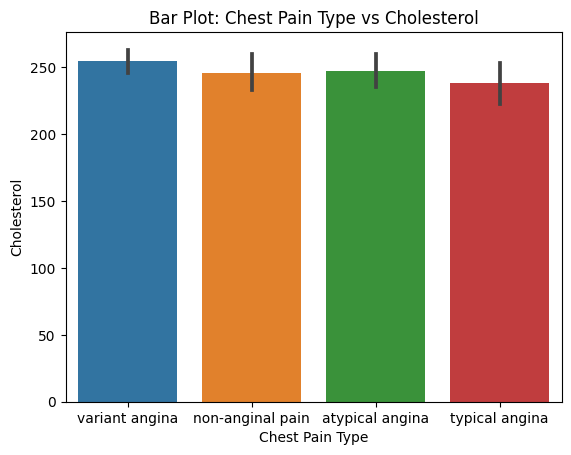

In [27]:
sns.barplot(x='chest_pain_type', y='cholesterol', data=dp)
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')
plt.title('Bar Plot: Chest Pain Type vs Cholesterol')
plt.show()

Correlation analysis

<ipython-input-28-f624bff326bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dp.corr()


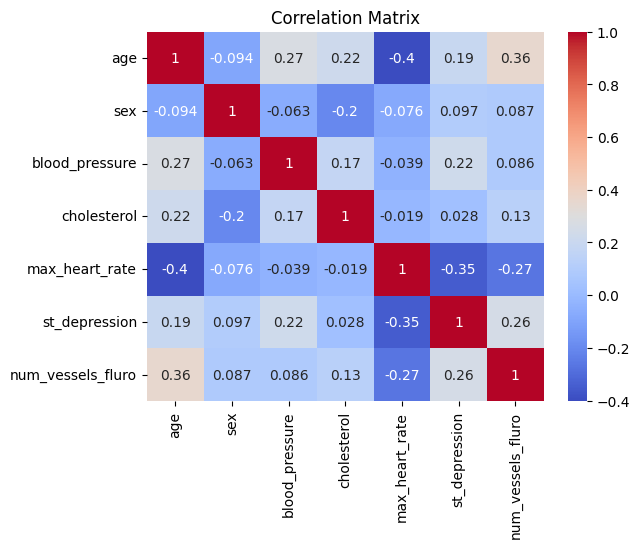

In [28]:
correlation_matrix = dp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

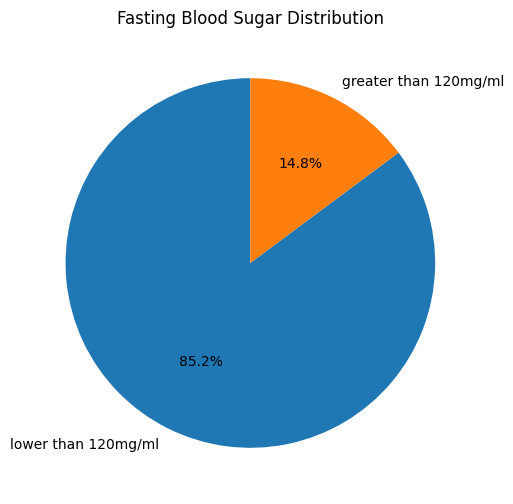

In [51]:
plt.figure(figsize=(8, 6))
dp['fasting_blood_sugar'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Fasting Blood Sugar Distribution')
plt.ylabel('')
plt.show()

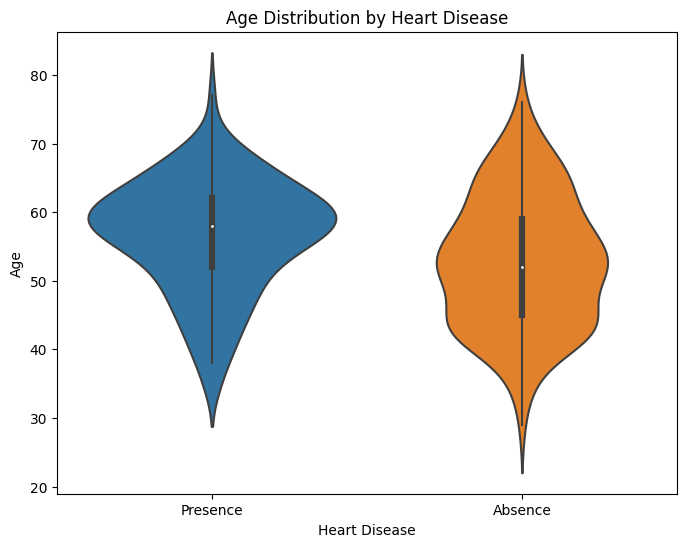

In [52]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target(HeartDisease)', y='age', data=dp)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


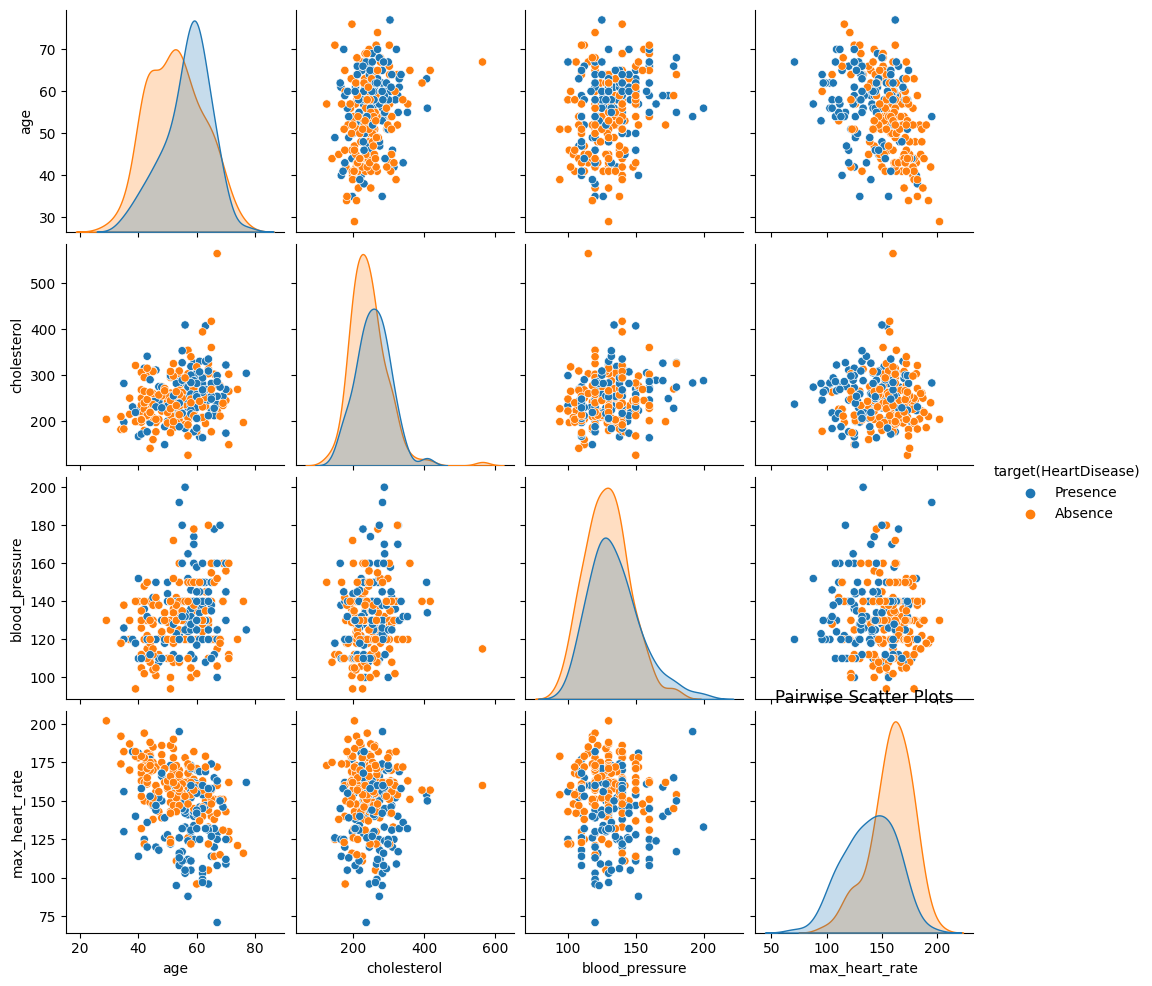

In [29]:
sns.pairplot(dp, vars=['age', 'cholesterol', 'blood_pressure', 'max_heart_rate'], hue='target(HeartDisease)')
plt.title("Pairwise Scatter Plots")
plt.show()

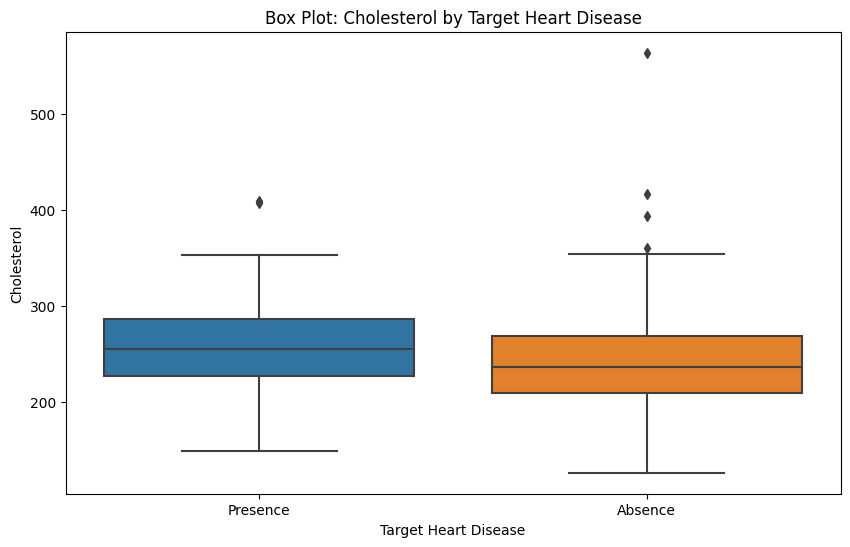

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target(HeartDisease)', y='cholesterol', data=dp)
plt.xlabel('Target Heart Disease')
plt.ylabel('Cholesterol')
plt.title('Box Plot: Cholesterol by Target Heart Disease')
plt.show()

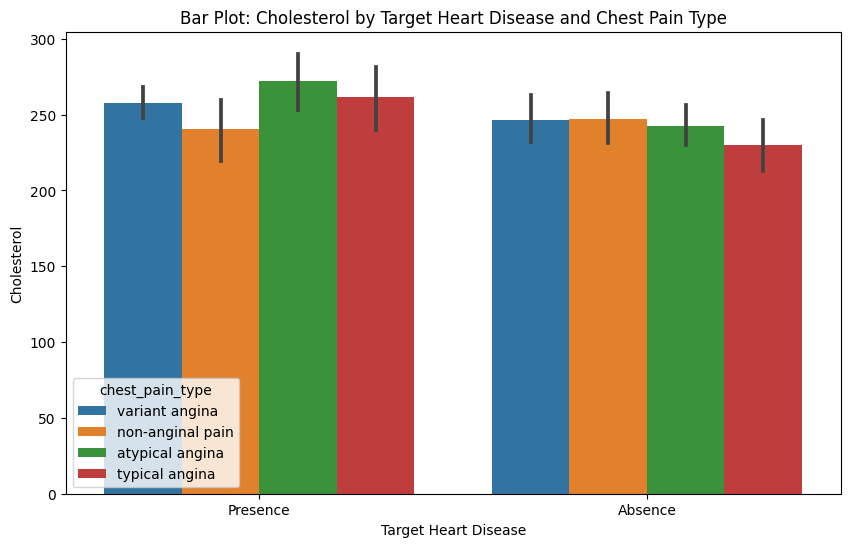

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='target(HeartDisease)', y='cholesterol', hue='chest_pain_type', data=dp)
plt.xlabel('Target Heart Disease')
plt.ylabel('Cholesterol')
plt.title('Bar Plot: Cholesterol by Target Heart Disease and Chest Pain Type')
plt.show()


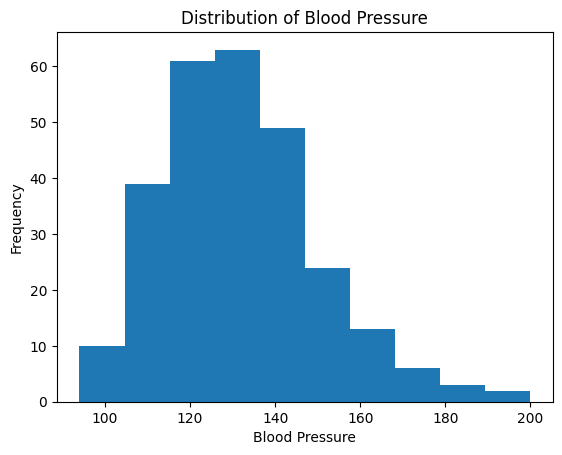

In [32]:
plt.hist(dp['blood_pressure'], bins=10)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Pressure')
plt.show()

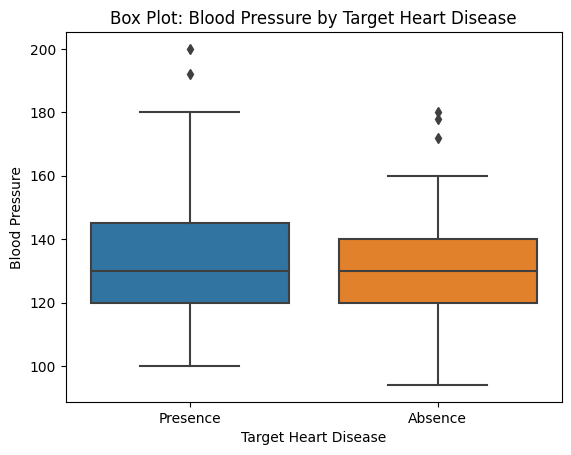

In [33]:
sns.boxplot(x='target(HeartDisease)', y='blood_pressure', data=dp)
plt.xlabel('Target Heart Disease')
plt.ylabel('Blood Pressure')
plt.title('Box Plot: Blood Pressure by Target Heart Disease')
plt.show()

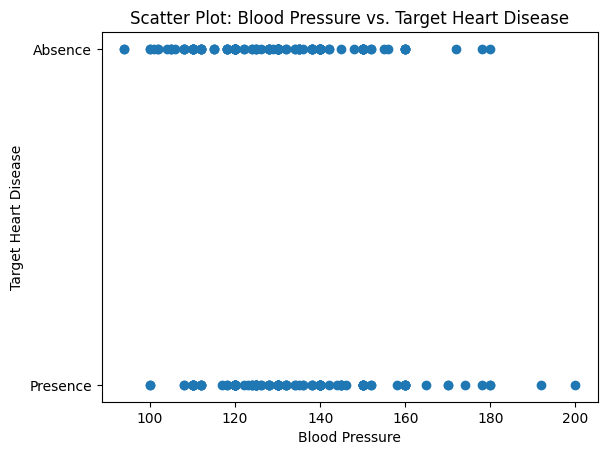

In [34]:
plt.scatter(dp['blood_pressure'], dp['target(HeartDisease)'])
plt.xlabel('Blood Pressure')
plt.ylabel('Target Heart Disease')
plt.title('Scatter Plot: Blood Pressure vs. Target Heart Disease')
plt.show()

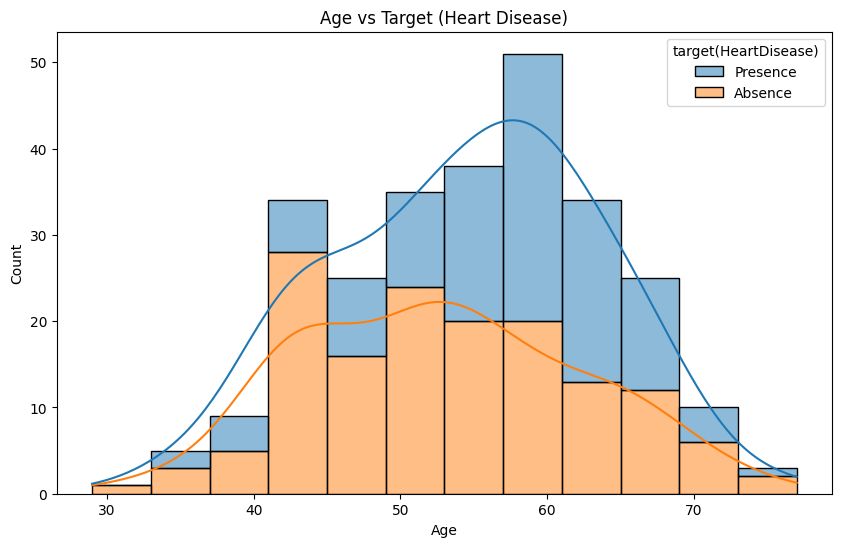

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dp, x='age', hue='target(HeartDisease)', kde=True, multiple='stack')
plt.title('Age vs Target (Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


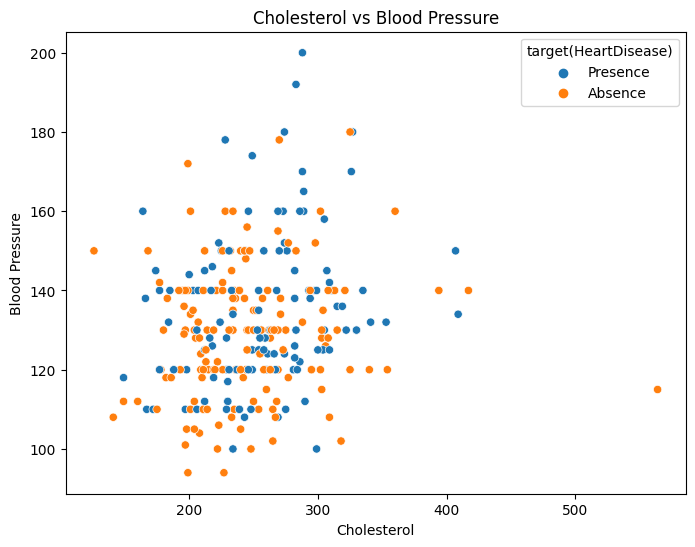

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dp, x='cholesterol', y='blood_pressure', hue='target(HeartDisease)')
plt.title('Cholesterol vs Blood Pressure')
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure')
plt.show()

In [41]:
age_counts = dp.groupby('age')['target(HeartDisease)'].sum()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('Age')
plt.ylabel('Heart Disease Cases')
plt.title('Distribution of Heart Disease Cases by Age')
plt.xticks(rotation=45)
plt.show()

Creating a pie chart to visualization